In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape


In [2]:
def normalize_data(data):
    scaler = TimeSeriesScalerMeanVariance()
    data_normalized = scaler.fit_transform(data.values.reshape((data.shape[0], data.shape[1], 1)))
    return pd.DataFrame(data_normalized.reshape(data_normalized.shape[0], data_normalized.shape[1]), columns=data.columns)


In [3]:
def apply_kmeans_dtw(data_normalized, n_clusters=3):
    kmeans_dtw = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)
    data_normalized['cluster'] = kmeans_dtw.fit_predict(data_normalized)
    return kmeans_dtw, data_normalized


In [24]:
def plot_clusters(data_normalized, kmeans_dtw, y_label="Valeur", num_labels=10):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    for cluster_id in range(kmeans_dtw.n_clusters):
        cluster_data = data_normalized[data_normalized['cluster'] == cluster_id]

        for idx, row in cluster_data.iterrows():
            axes[cluster_id // 2, cluster_id % 2].plot(range(24), row[:-1], color='gray', alpha=0.5)
        
        cluster_center = kmeans_dtw.cluster_centers_[cluster_id]
        
        axes[cluster_id // 2, cluster_id % 2].plot(range(24), cluster_center.flatten(), color='red', linewidth=3, label=f"Centre du cluster {cluster_id}")
        
        axes[cluster_id // 2, cluster_id % 2].set_title(f"Séries temporelles du Cluster {cluster_id}")
        axes[cluster_id // 2, cluster_id % 2].set_xlabel("Heures")
        axes[cluster_id // 2, cluster_id % 2].set_ylabel(y_label)
        axes[cluster_id // 2, cluster_id % 2].set_yticks(np.linspace(data_normalized.iloc[:, :-1].min().min(), data_normalized.iloc[:, :-1].max().max(), num_labels))
        axes[cluster_id // 2, cluster_id % 2].grid(True)

    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

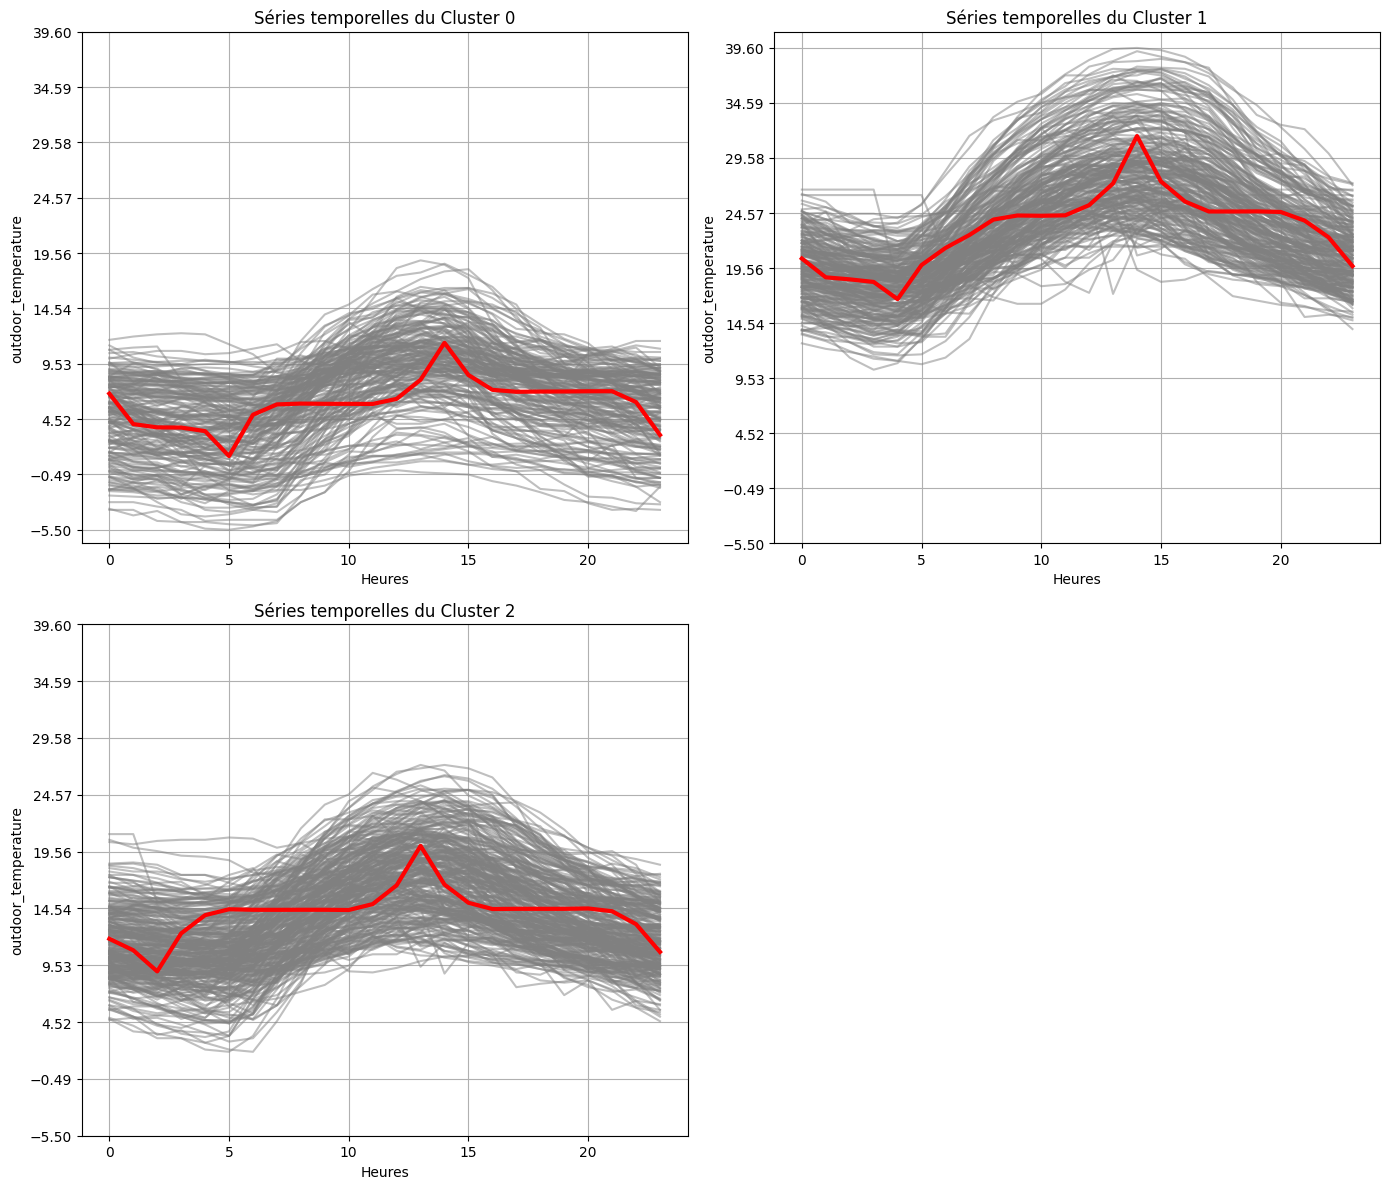

In [25]:
df_temp_out = pd.read_csv('outdoor_temperature.csv')  

#data_normalized = normalize_data(df_temp_out)
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_temp_out, 3)
plot_clusters(data_normalized_with_cluster, kmeans_dtw,"outdoor_temperature")


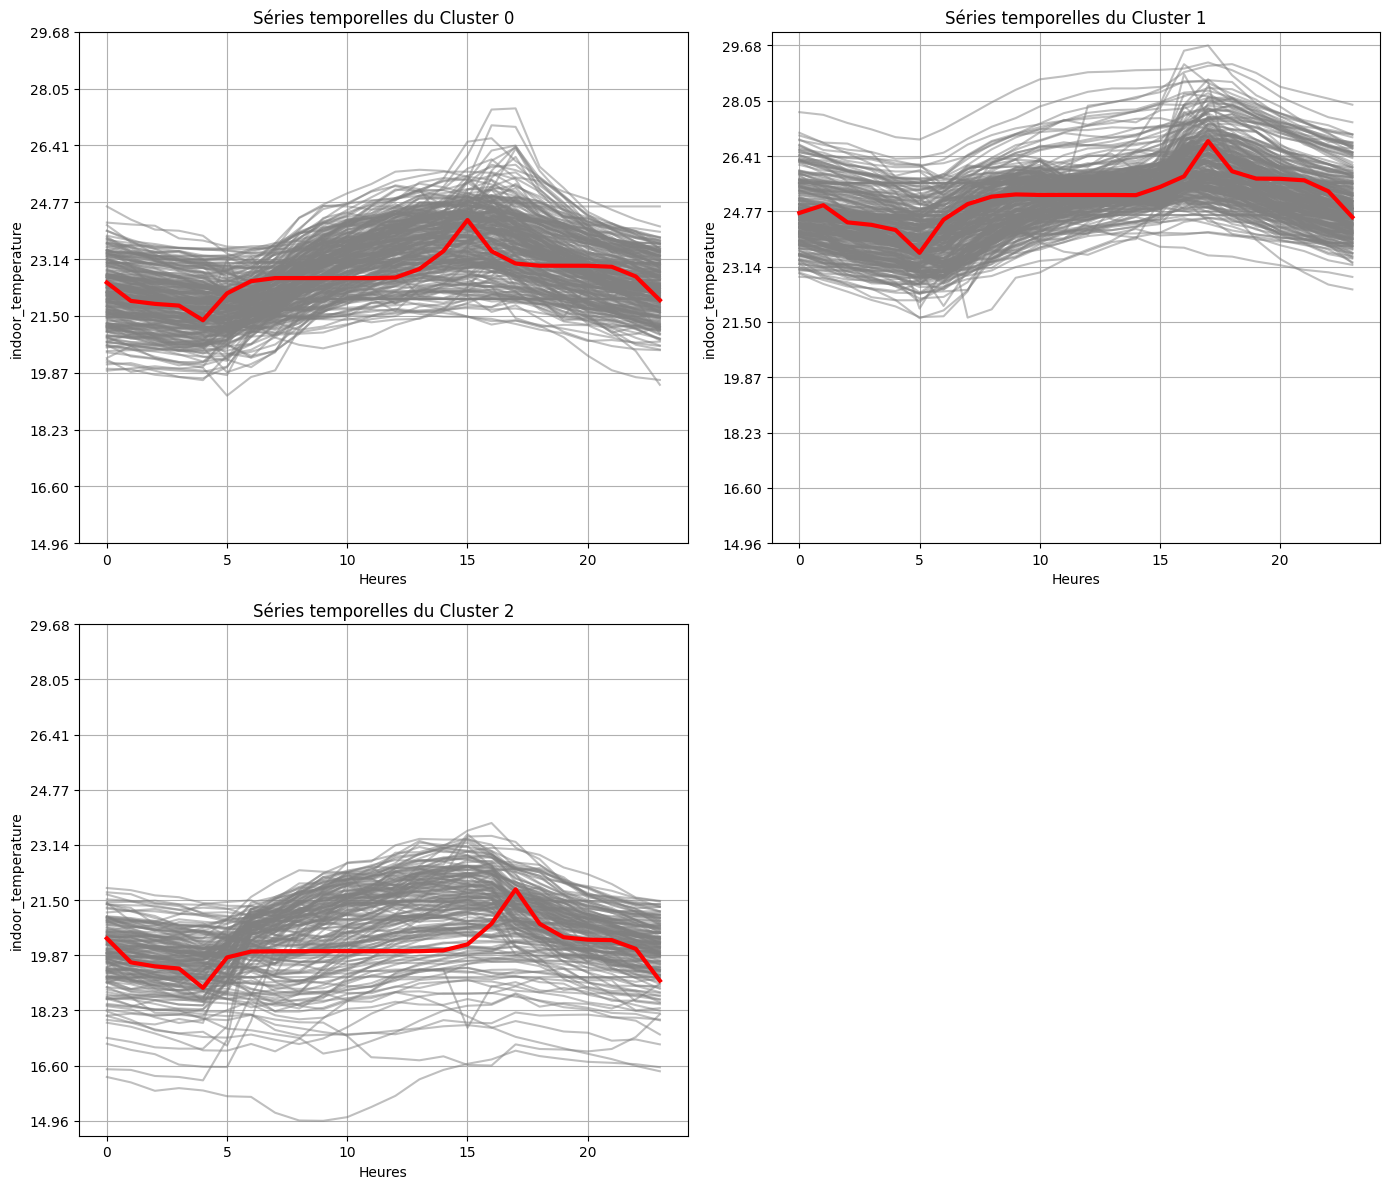

In [26]:
df_temp_in= pd.read_csv('indoor_temperature.csv')  

#data_normalized = normalize_data(df_temp_in)
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_temp_in, 3)
plot_clusters(data_normalized_with_cluster, kmeans_dtw,"indoor_temperature")


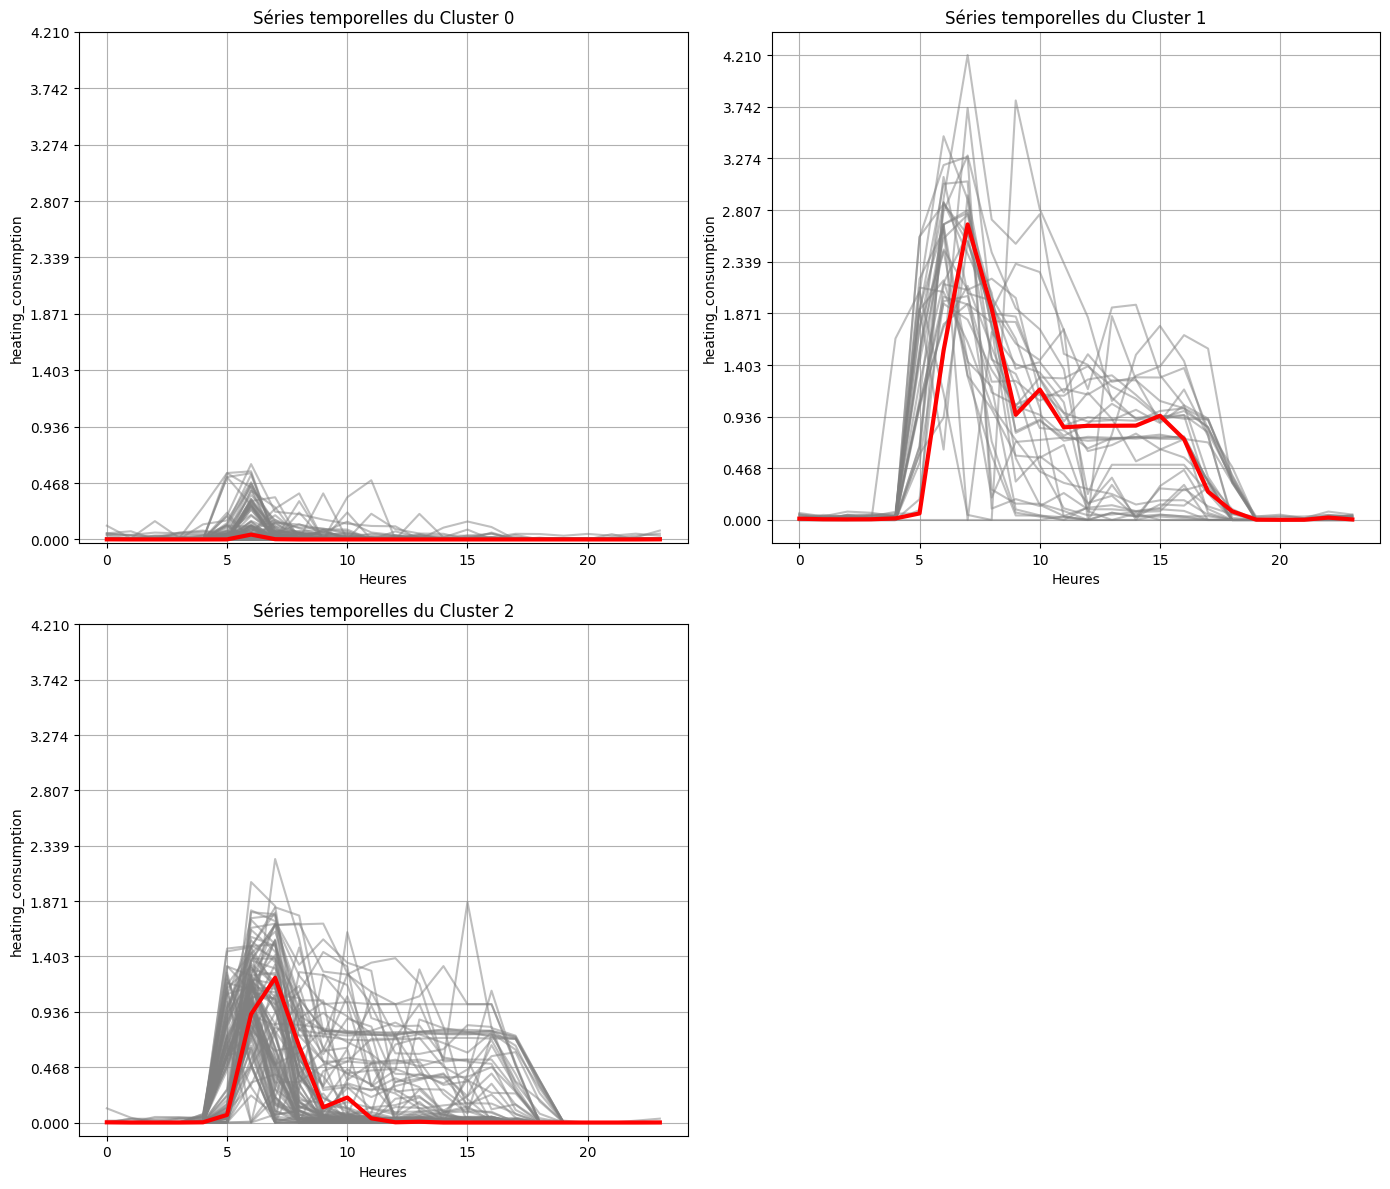

In [27]:
df_heat = pd.read_csv('heating_consumption.csv')  

#data_normalized = normalize_data(df_heat)
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_heat, 3)
plot_clusters(data_normalized_with_cluster, kmeans_dtw,"heating_consumption")


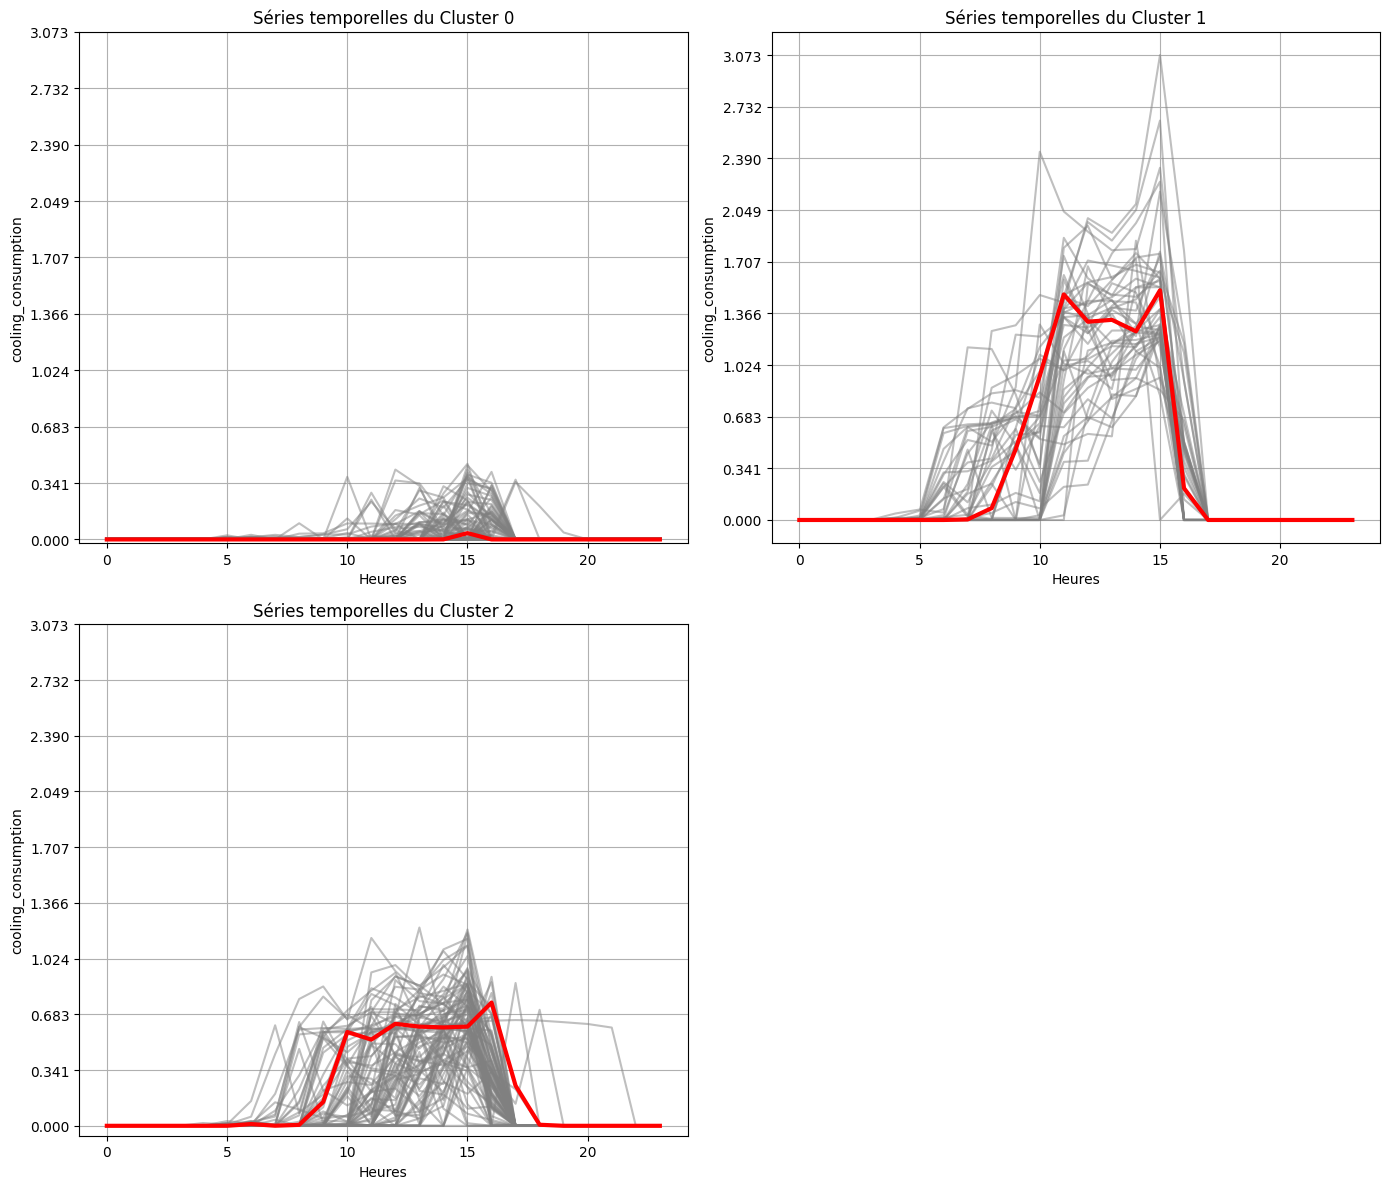

In [28]:
df_cool = pd.read_csv('cooling_consumption.csv')  
#data_normalized = normalize_data(df_cool)
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_cool, 3)
plot_clusters(data_normalized_with_cluster, kmeans_dtw,"cooling_consumption")


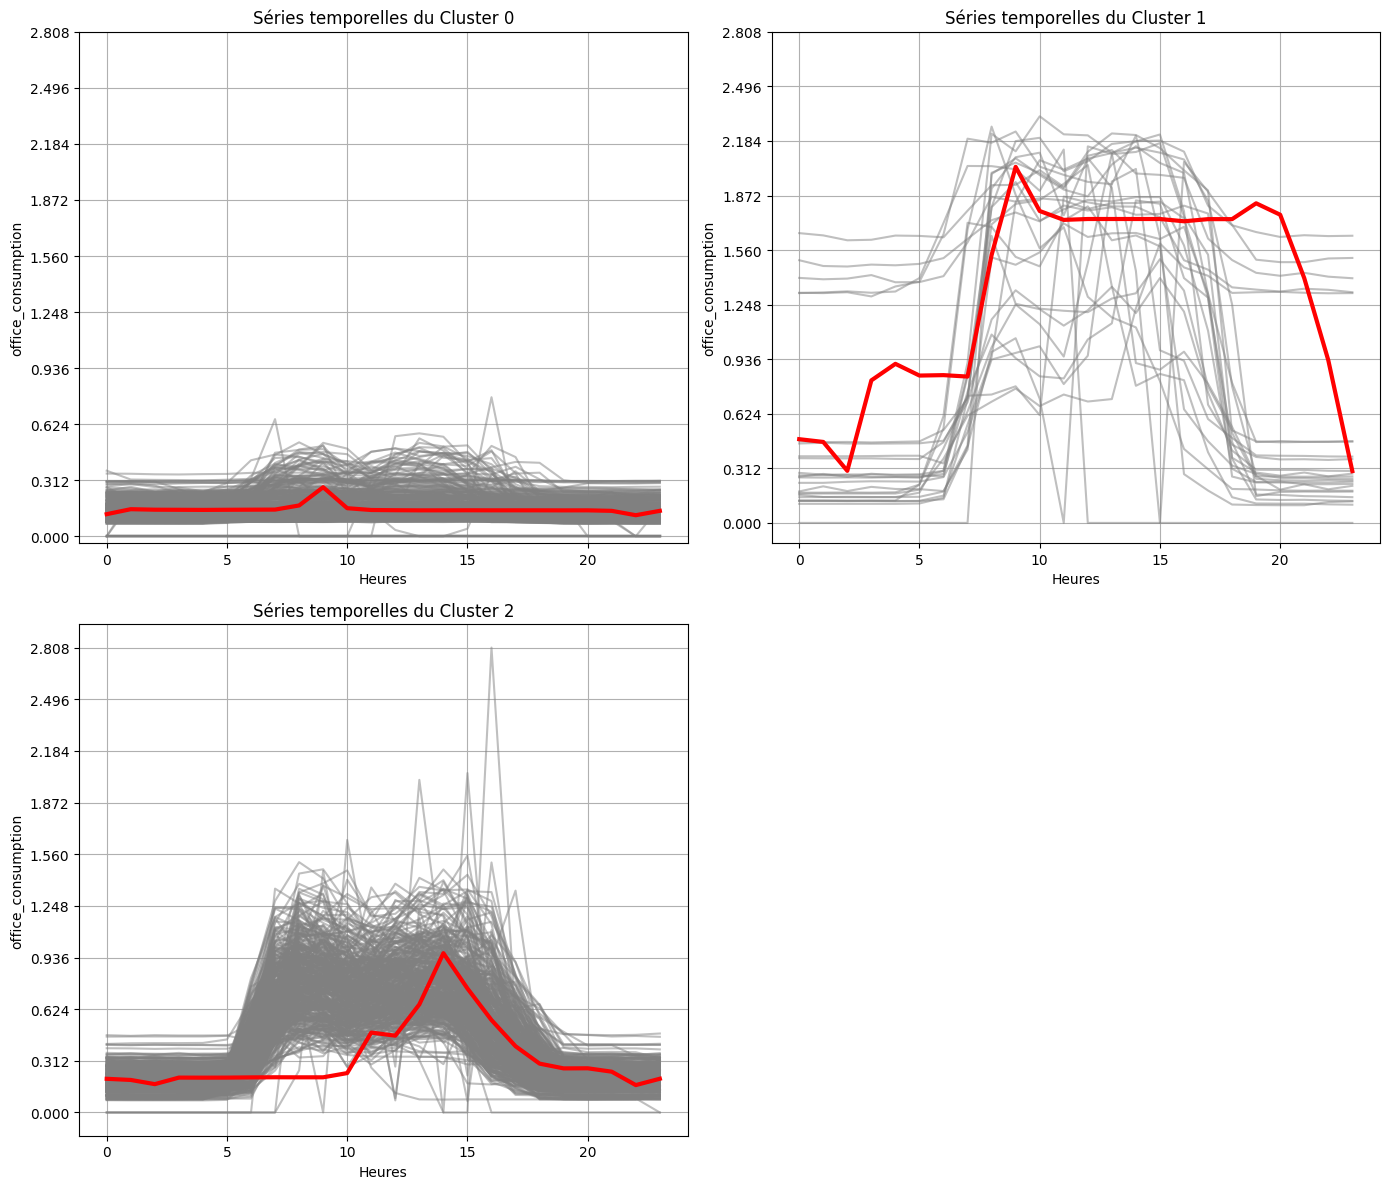

In [29]:
df_office = pd.read_csv('office_consumption.csv')
#data_normalized = normalize_data(df_office)
kmeans_dtw, data_normalized_with_cluster = apply_kmeans_dtw(df_office, 3)
plot_clusters(data_normalized_with_cluster, kmeans_dtw,"office_consumption")
